In [47]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm

import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.grid_search import GridSearchCV

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

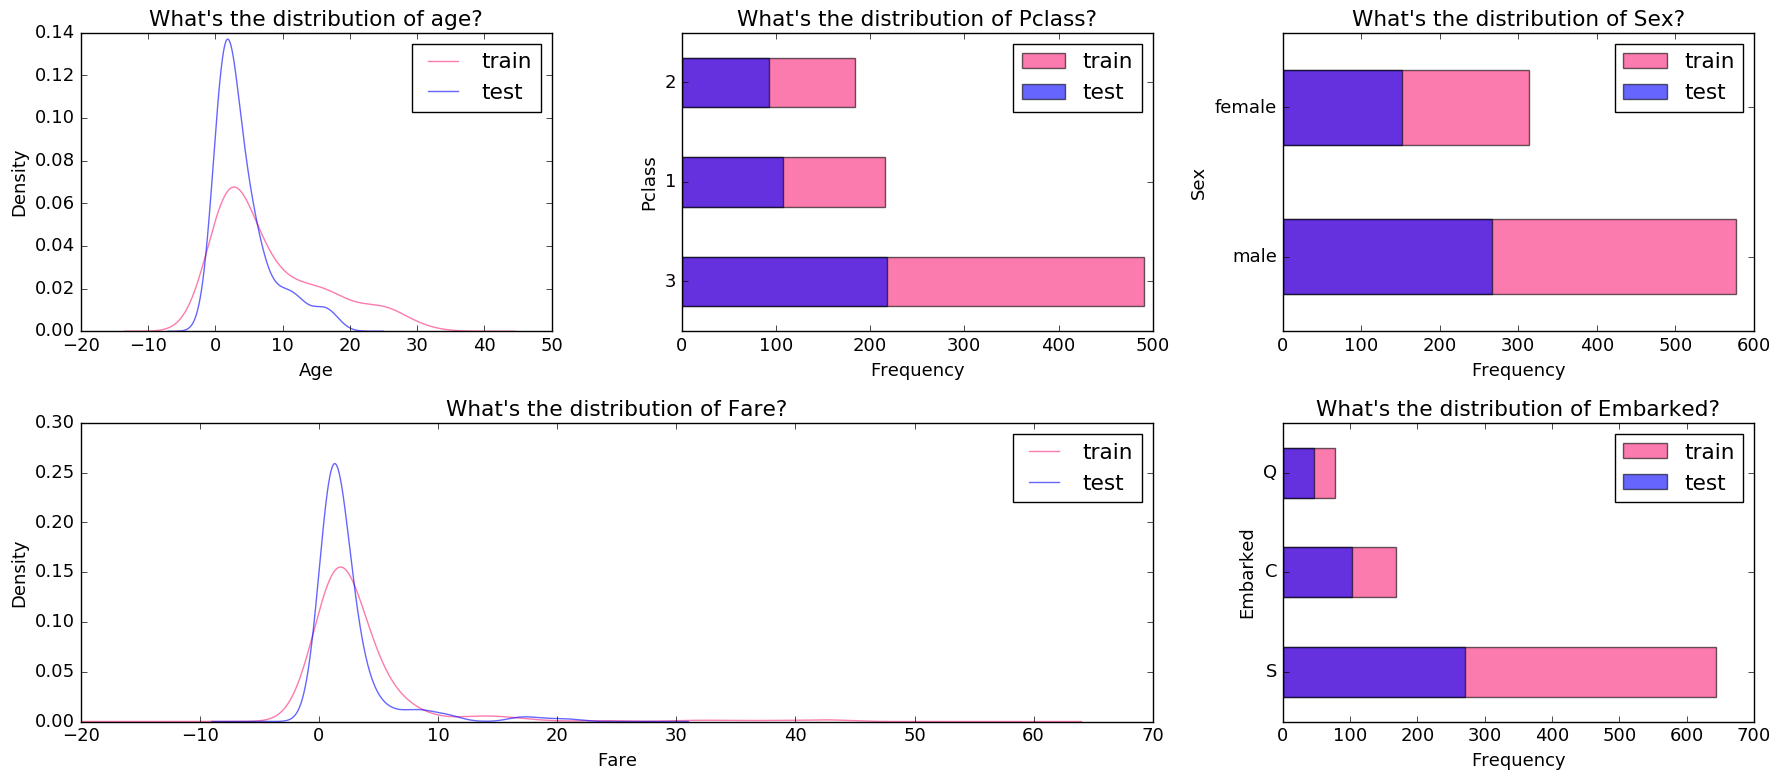

In [49]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
train.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Age.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Pclass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
train.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

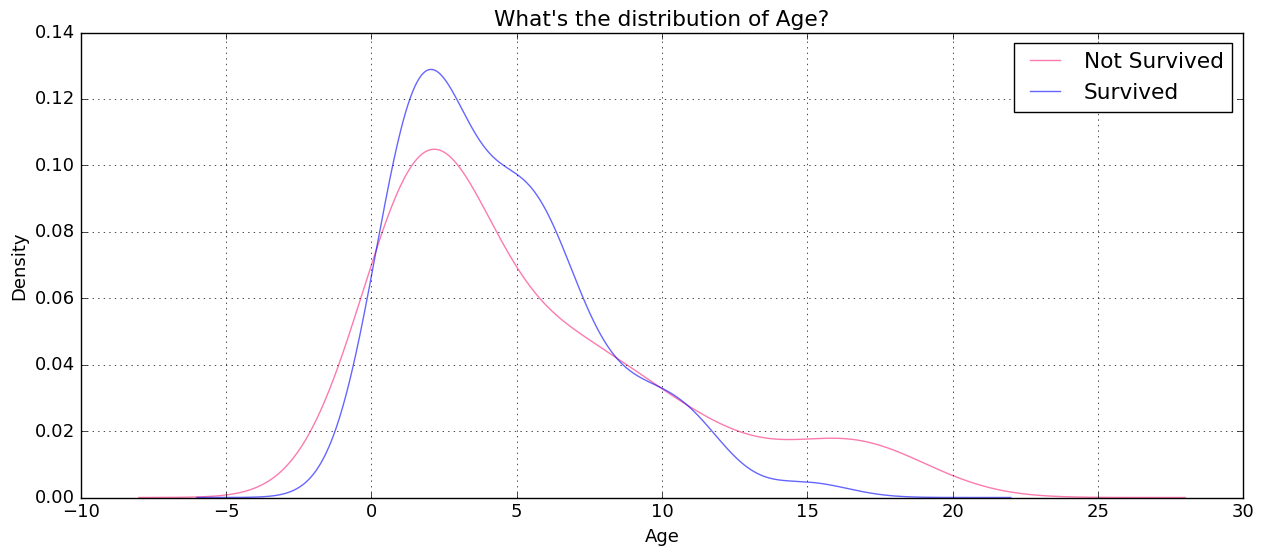

In [50]:
fig = plt.figure(figsize=(15, 6))

train[train.Survived==0].Age.value_counts().plot(kind='density', color='#FA2379', label='Not Survived', alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind='density', label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

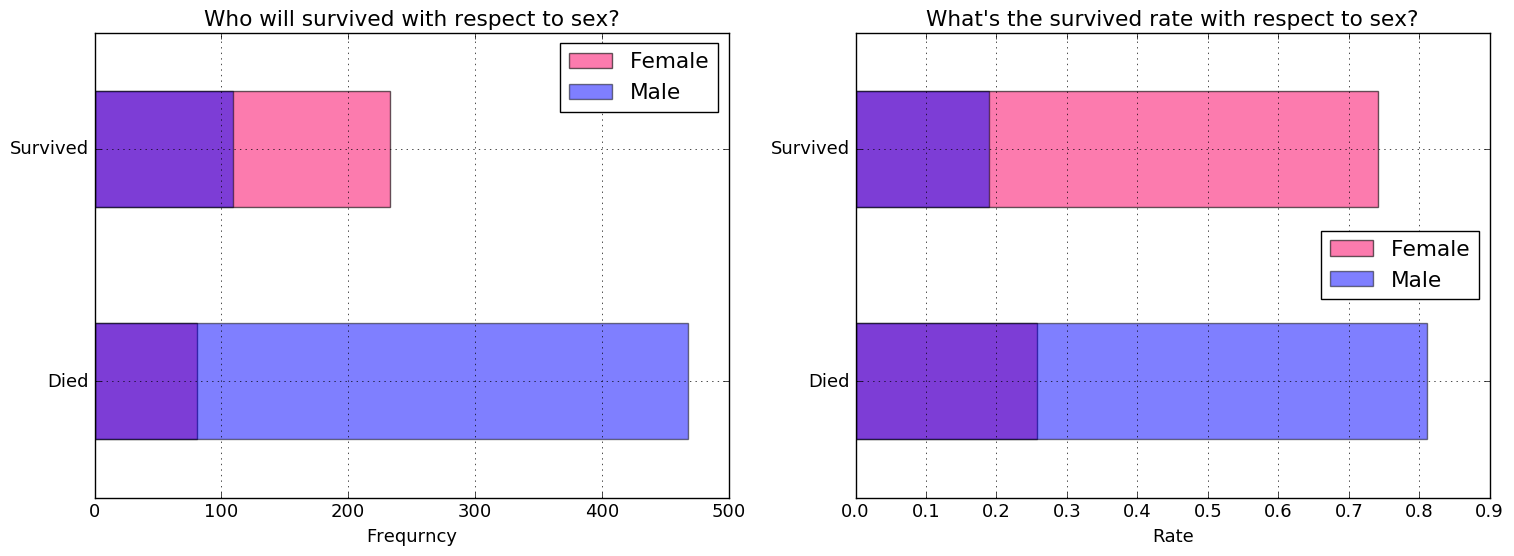

In [51]:
df_male = train[train.Sex=='male'].Survived.value_counts().sort_index()
df_female = train[train.Sex=='female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
df_male.plot(kind='barh', label='Male', alpha=alpha-0.1)
ax1.set_xlabel('Frequrncy')
ax1.set_yticklabels(['Died', 'Survived'])
ax1.set_title("Who will survived with respect to sex?" )
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2), (0,1))
(df_female/train[train.Sex=='female'].shape[0]).plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
(df_male/train[train.Sex=='male'].shape[0]).plot(kind='barh', label='Male', alpha=alpha-0.1)
ax2.set_xlabel('Rate')
ax2.set_yticklabels(['Died', 'Survived'])
ax2.set_title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()

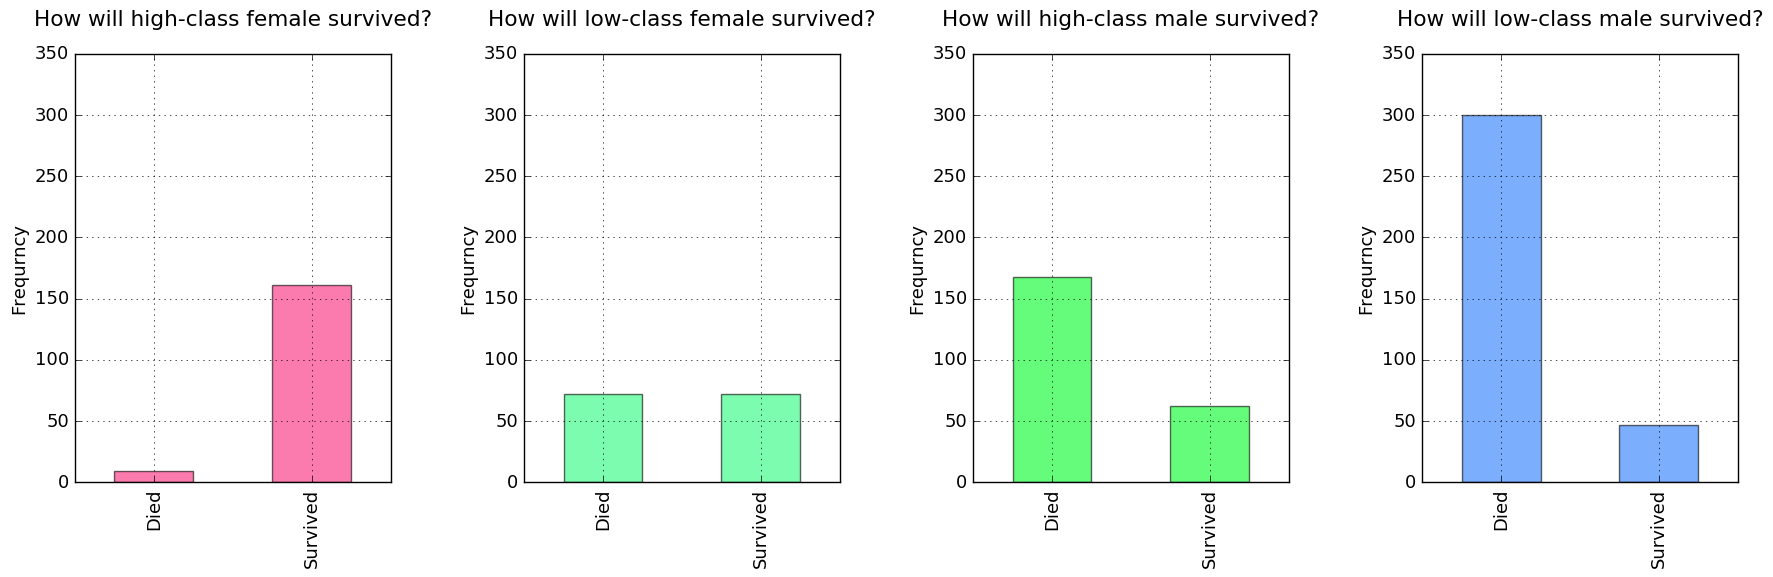

In [52]:
df_male = train[train.Sex=='male']
df_female = train[train.Sex=='female']
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,4), (0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#FA2379', alpha=alpha)
ax1.set_ylabel('Frequrncy')
ax1.set_ylim((0,350))
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("How will high-class female survived?", y=1.05)
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequrncy')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequrncy')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequrncy')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

In [53]:
train[train.Ticket=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [54]:
train[train.Ticket=='CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


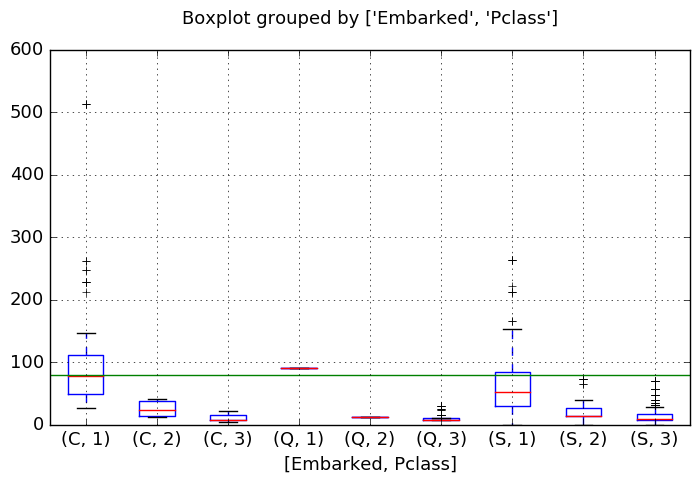

In [57]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = train.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
ax.set_title('', y=1.1)

train[train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

In [58]:
_ = train.set_value(train.Embarked.isnull(), 'Embarked', 'C')

,Pclass,Fare,Embarked
152,3,NaN,S


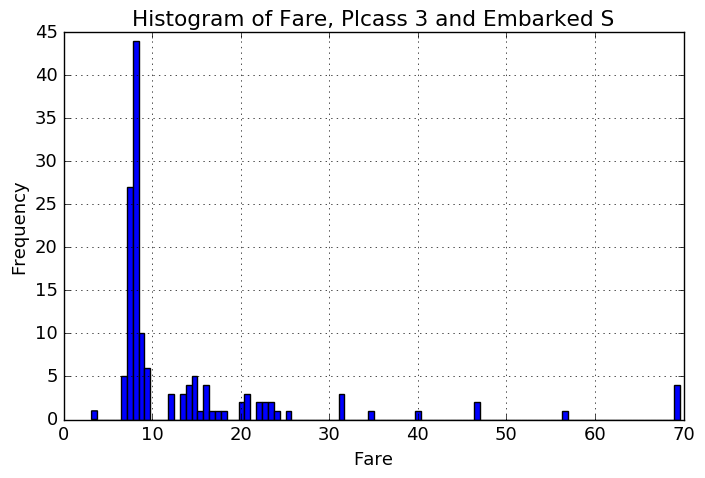

In [59]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.hist(bins=100, ax=ax)
test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')

test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [60]:
print ("The top 5 most common value of Fare")
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()

The top 5 most common value of Fare


8.0500    17
7.7750    10
7.8958    10
7.8542     8
8.6625     8
Name: Fare, dtype: int64

In [61]:
_ = test.set_value(test.Fare.isnull(), 'Fare', 8.05)

In [62]:
full = pd.concat([train, test], ignore_index=True)
_ = full.set_value(full.Cabin.isnull(), 'Cabin', 'U0')

In [63]:
import re
names = full.Name.map(lambda x: len(re.split(' ', x)))
_ = full.set_value(full.index, 'Names', names)
del names

In [64]:
title = full.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
title[title=='Mme'] = 'Mrs'
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
_ = full.set_value(full.index, 'Title', title)
del title

In [65]:
deck = full[~full.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
deck = pd.factorize(deck)[0]
_ = full.set_value(full.index, 'Deck', deck)
del deck

In [66]:
checker = re.compile("([0-9]+)")
def roomNum(x):
    nums = checker.search(x)
    if nums:
        return int(nums.group())+1
    else:
        return 1
rooms = full.Cabin.map(roomNum)
_ = full.set_value(full.index, 'Room', rooms)
del checker, roomNum
full['Room'] = full.Room/full.Room.sum()

In [67]:
full['Group_num'] = full.Parch + full.SibSp + 1

In [68]:
full['Group_size'] = pd.Series('M', index=full.index)
_ = full.set_value(full.Group_num>4, 'Group_size', 'L')
_ = full.set_value(full.Group_num==1, 'Group_size', 'S')

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full['NorFare'] = pd.Series(scaler.fit_transform(full.Fare.reshape(-1,1)).reshape(-1), index=full.index)

In [70]:
def setValue(col):
    _ = train.set_value(train.index, col, full[:891][col].values)
    _ = test.set_value(test.index, col, full[891:][col].values)

for col in ['Deck', 'Room', 'Group_size', 'Group_num', 'Names', 'Title']:
    setValue(col)

In [71]:
full.drop(labels=['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket', 'Fare'], axis=1, inplace=True)
full = pd.get_dummies(full, columns=['Embarked', 'Sex', 'Title', 'Group_size'])

In [72]:
full.drop('Age',axis = 1,inplace=True)

full['NorNames'] = pd.Series(scaler.fit_transform(full.Names.reshape(-1,1)).reshape(-1), index=full.index)
full['Group_num'] = pd.Series(scaler.fit_transform(full.Group_num.reshape(-1,1)).reshape(-1), index=full.index)


/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/liuhang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
for col in [ 'NorFare', 'NorNames', 'Group_num']:
    setValue(col)


In [74]:
train.Sex = np.where(train.Sex=='female', 0, 1)
test.Sex = np.where(test.Sex=='female', 0, 1)

In [75]:
train.drop(labels=['PassengerId', 'Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
test.drop(labels=['Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)

In [76]:
train = pd.get_dummies(train, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test = pd.get_dummies(test, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test['Title_Sir'] = pd.Series(0, index=test.index)

In [78]:
from sklearn import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [79]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(estimator, X, y, title):
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(title))
    plt.legend(loc="lower right")
    plt.show()

In [80]:
X = train.drop(['Survived'], axis=1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
from sklearn.metrics import accuracy_score
scoring = make_scorer(accuracy_score, greater_is_better=True)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights='uniform')
parameters = {'n_neighbors':[3,4,5], 'p':[1,2]}
clf_knn = get_model(KNN, parameters, X_train, y_train, scoring)

0.816143497758
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')


TypeError: 'module' object is not callable

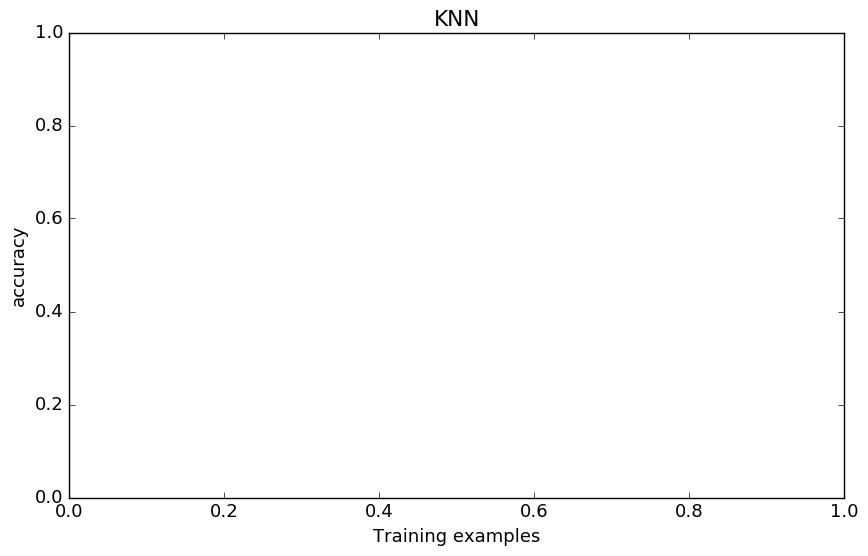

In [83]:
print (accuracy_score(y_test, clf_knn.predict(X_test)))
print (clf_knn)
plot_learning_curve(clf_knn, 'KNN', X, y, cv=4);